### traj_0360-0390_0005622663-49K6KY9401_1

** packages **

In [48]:
from ctd2xray import cchdo
from mpl_toolkits.basemap import Basemap
from pymongo import MongoClient
import gsw
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr
from Circles.circles import circle

In [2]:
%matplotlib inline

** traj_0360-0390_0005622663 **

Dec. 27, 1993 - Jan. 26, 1994

In [53]:
rcs_eddies = MongoClient().eddies.rcs_eddies

In [54]:
eddy_code = 'traj_0360-0390_0005622663'

In [55]:
eddy_rclv = rcs_eddies.find_one({'_id': eddy_code})

In [56]:
eddy_traj = eddy_rclv['features'][2]['geometry']['coordinates']

In [57]:
obs_num = len(eddy_traj)

In [58]:
lon_eddy = np.zeros(obs_num)
lat_eddy = np.zeros(obs_num)

In [59]:
for i in range(obs_num):
    lon_eddy[i] = eddy_traj[i][0]
    lat_eddy[i] = eddy_traj[i][1]

** 49K6KY9401_1 **

Aug. 26, 2008 - Sep. 17, 2008

In [64]:
cchdo_ctd = MongoClient().eddies.cchdo_ctd

In [65]:
expo_code = '49K6KY9401_1'

In [66]:
cas_num = cchdo_ctd.find({'expocode': expo_code}).count()

In [67]:
lon_expo = np.zeros(cas_num)
lat_expo = np.zeros(cas_num)

In [68]:
# longitude range setting
# from 0 to 360
def format(longitude):
    if longitude > 0:
        longitude = longitude
    else:
        longitude = longitude + 360
    return longitude

In [69]:
i = 0
for expo in cchdo_ctd.find({'expocode': expo_code}).sort('time', 1):
    lon_expo[i] = format(expo['location']['coordinates'][0])
    lat_expo[i] = expo['location']['coordinates'][1]
    i = i+1

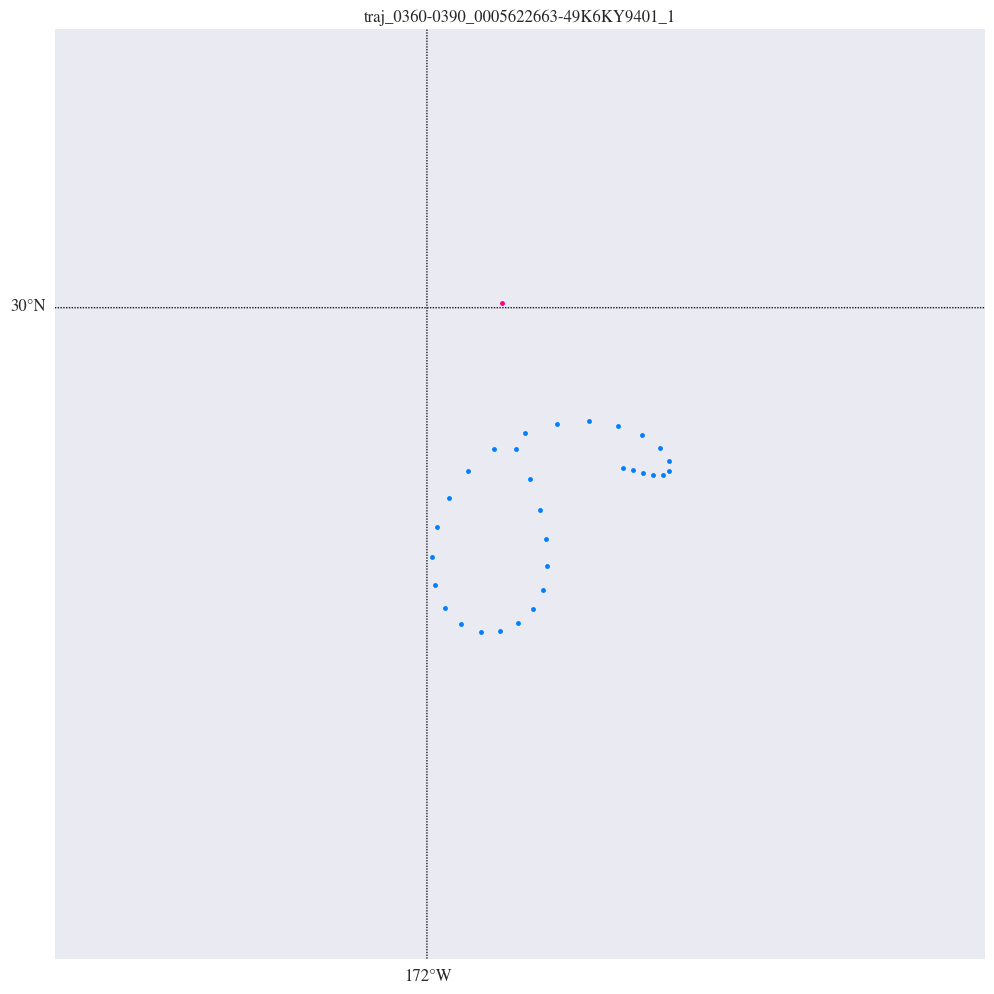

In [81]:
sns.set(color_codes=True)
plt.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['font.family'] = "STIX"
my_map = Basemap(projection='cyl', llcrnrlat=29.3, urcrnrlat=30.3,\
                 llcrnrlon=187.6, urcrnrlon=188.6, resolution='c')
my_map.fillcontinents()
parallels = np.arange(-90, 90, 1)
my_map.drawparallels(parallels, labels=[True,False,False,True])
meridians = np.arange(0, 360, 1)
my_map.drawmeridians(meridians, labels=[True,False,False,True])
x_eddy, y_eddy = my_map(lon_eddy, lat_eddy)
x_expo, y_expo = my_map(lon_expo, lat_expo)
my_map.plot(x_eddy, y_eddy, '.', color='#0080ff')
my_map.plot(x_expo, y_expo, '.', color='#ff0080')
plt.title(eddy_code + '-' + expo_code)
plt.savefig('figures/figure-1/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

** temperature-salinity **

In [82]:
STA = 62
CAS = 1

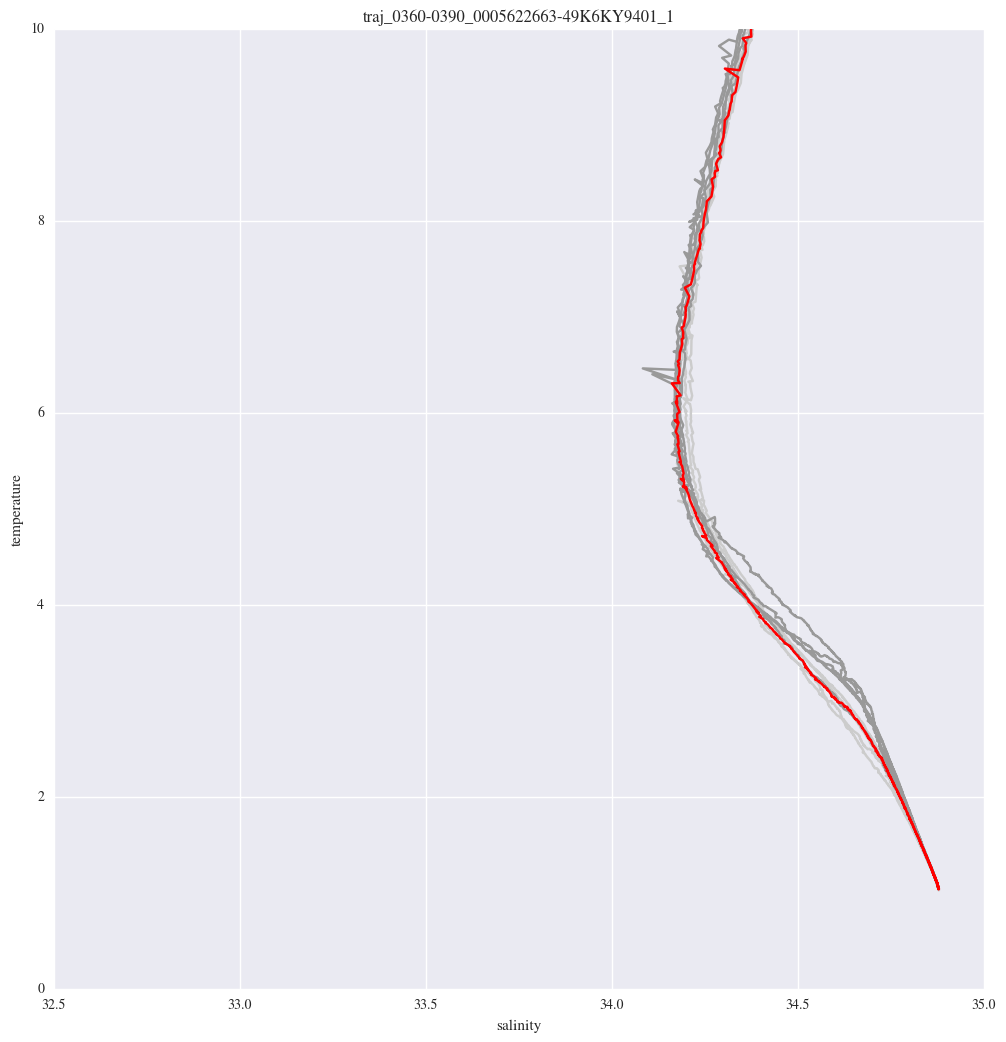

In [95]:
sns.set(color_codes=True)
mpl.rcParams['font.family'] = "STIX"
mpl.rcParams['figure.figsize'] = (12, 12)
for expo in cchdo_ctd.find({'expocode': expo_code}).sort('time', 1):
    ds = xr.open_dataset(expo['path'])
    woce = str(ds.WOCE_ID)
    time = ds.time.values[0]
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    cast = int(filter(str.isdigit, str(ds.CAST_NUMBER)))
    if (station == STA and cast == CAS):
        DAT = time
        LAT = lat
        LON = lon
        plt.plot(sa, ct, color='#ff0000', zorder=2)
    elif (STA-6) < station < STA:
        plt.plot(sa, ct, color='#cccccc', zorder=1)
    elif STA < station < (STA+6):
        plt.plot(sa, ct, color='#999999', zorder=1)
plt.xlim([32.5, 35])
plt.ylim([0, 10])
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('salinity')
plt.ylabel('temperature')
plt.savefig('figures/figure-2/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

** pressure-temperature **

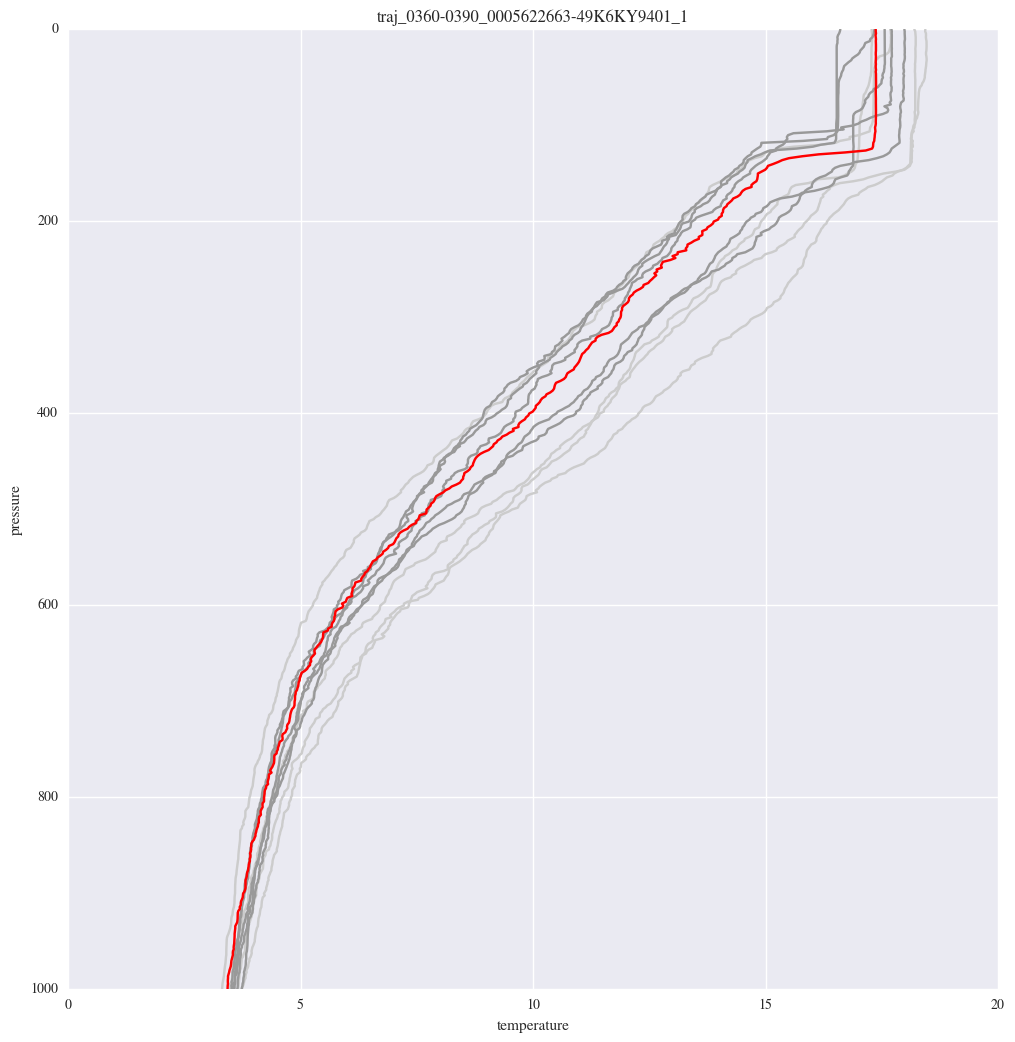

In [87]:
sns.set(color_codes=True)
plt.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['font.family'] = "STIX"
for expo in cchdo_ctd.find({'expocode': expo_code}).sort('time', 1):
    ds = xr.open_dataset(expo['path'])
    woce = str(ds.WOCE_ID)
    time = ds.time.values[0]
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    cast = int(filter(str.isdigit, str(ds.CAST_NUMBER)))
    if (station == STA and cast == CAS):
        LAT = lat
        plt.plot(ct, p, color='#ff0000', zorder=2)
    elif (STA-6) < station < STA:
        plt.plot(ct, p, color='#cccccc', zorder=1)
    elif STA < station < (STA+6):
        plt.plot(ct, p, color='#999999', zorder=1)
plt.xlim([0, 20])
plt.ylim([1000, 0])
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('temperature')
plt.ylabel('pressure')
plt.savefig('figures/figure-3/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

** pressure-salinity **

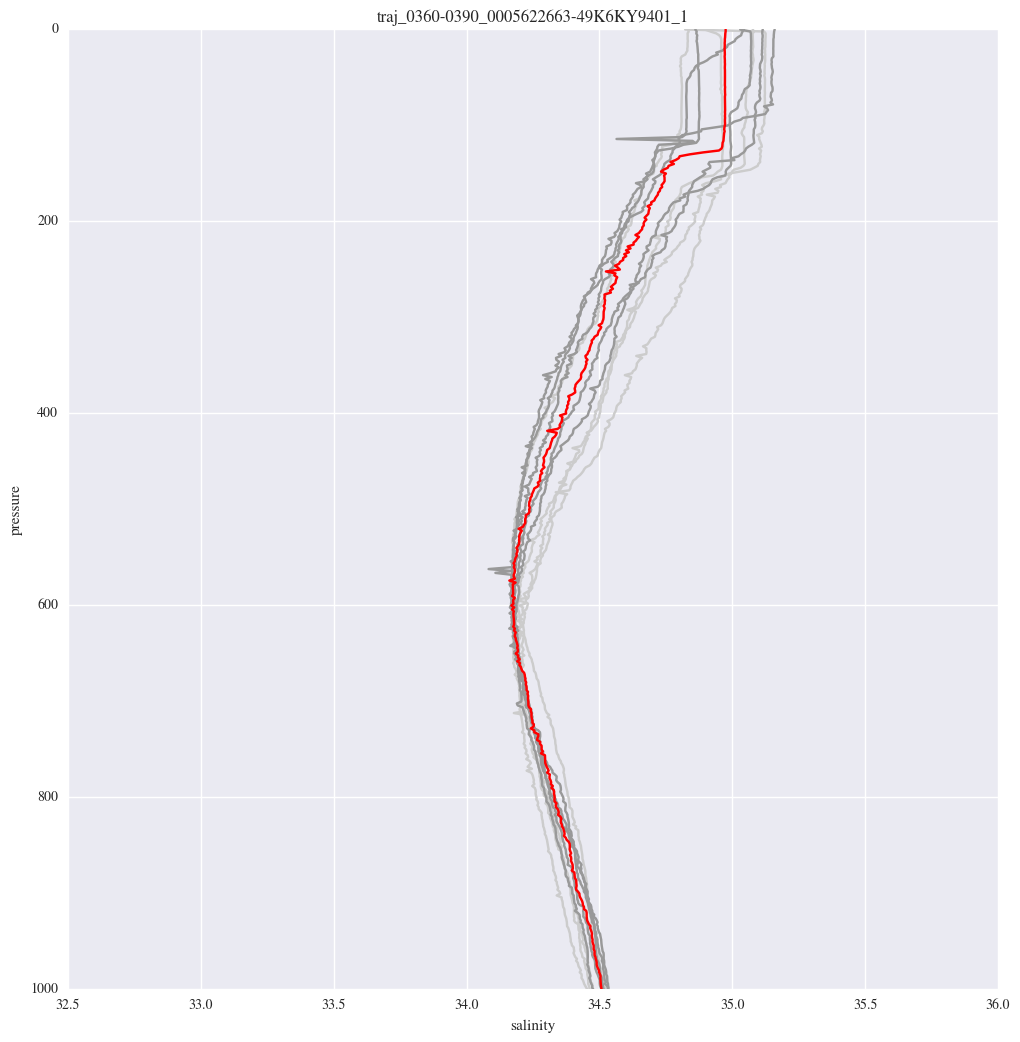

In [88]:
sns.set(color_codes=True)
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['font.family'] = "STIX"
for expo in cchdo_ctd.find({'expocode': expo_code}).sort('time', 1):
    ds = xr.open_dataset(expo['path'])
    time = ds.time.values[0]
    woce = str(ds.WOCE_ID)
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    cast = int(filter(str.isdigit, str(ds.CAST_NUMBER)))
    if (station == STA and cast == CAS):
        DAT = time
        LAT = lat
        plt.plot(sa, p, color='#ff0000', zorder=2)
    elif (STA-6) < station < STA:
        plt.plot(sa, p, color='#cccccc', zorder=1)
    elif STA < station < (STA+6):
        plt.plot(sa, p, color='#999999', zorder=1)
plt.xlim([32.5, 36])
plt.ylim([1000, 0])
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('salinity')
plt.ylabel('pressure')
plt.savefig('figures/figure-4/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

** pressure-oxygen **

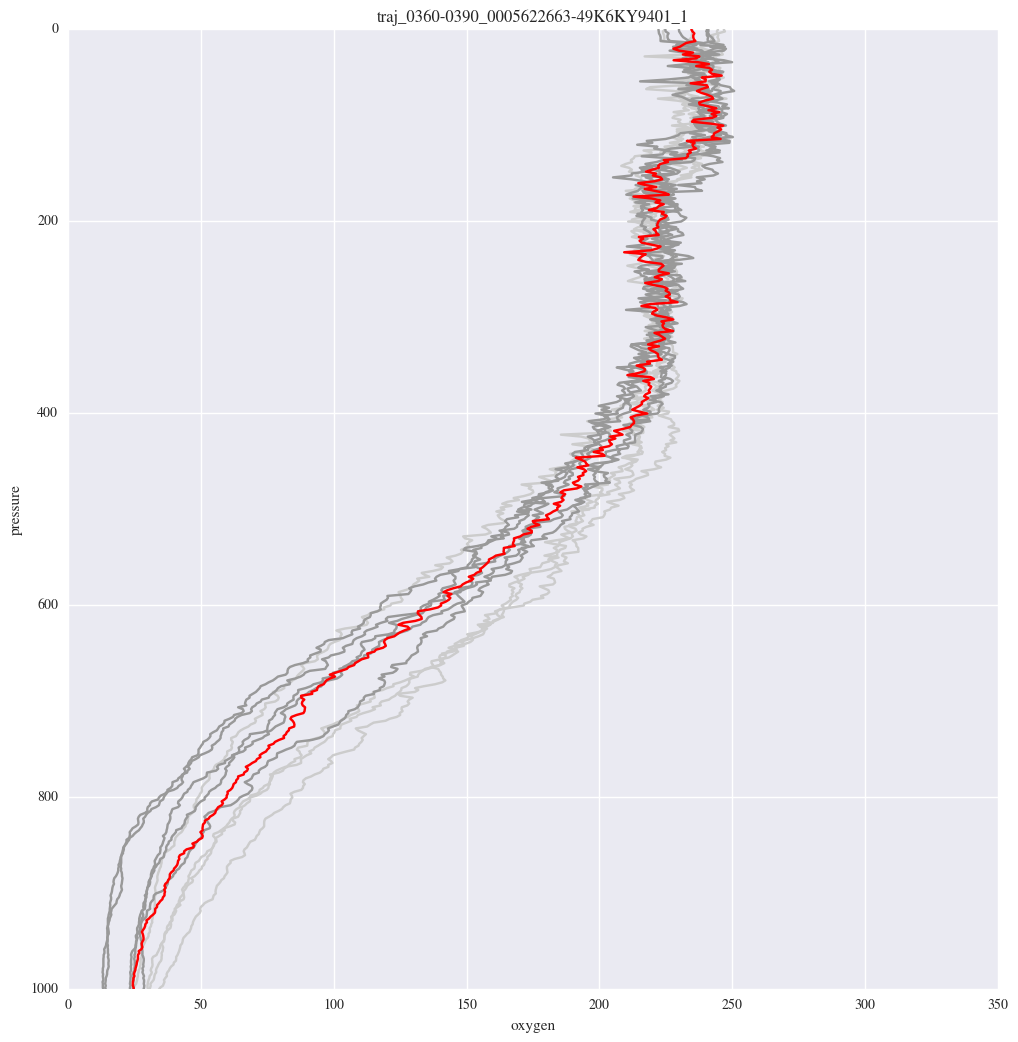

In [86]:
sns.set(color_codes=True)
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['font.family'] = "STIX"
for expo in cchdo_ctd.find({'expocode': expo_code}).sort('time', 1):
    ds = xr.open_dataset(expo['path'])
    woce = str(ds.WOCE_ID)
    time = ds.time.values[0]
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    cast = int(filter(str.isdigit, str(ds.CAST_NUMBER)))
    if (station == STA and cast == CAS):
        LAT = lat
        plt.plot(o, p, color='#ff0000', zorder=2)
    elif (STA-6) < station < STA:
        plt.plot(o, p, color='#cccccc', zorder=1)
    elif STA < station < (STA+6):
        plt.plot(o, p, color='#999999', zorder=1)
plt.xlim([0, 350])
plt.ylim([1000, 0])
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('oxygen')
plt.ylabel('pressure')
plt.savefig('figures/figure-5/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

In [89]:
expo

{u'_id': ObjectId('583c77e92895ee70a2e32001'),
 u'cast': u'1',
 u'category': u'CTD',
 u'expocode': u'49K6KY9401_1',
 u'location': {u'coordinates': [-121.2073, 31.006], u'type': u'Point'},
 u'path': u'/home/cz2397/data/cchdo-ctd/561_p02t_nc_ctd/p02t_00085_00001_ctd.nc',
 u'station': u'85',
 u'time': datetime.datetime(1994, 2, 10, 0, 11)}

** contours **

In [108]:
path_list = '/home/cz2397/data/cchdo-ctd/561_p02t_nc_ctd/p02t_*'

In [109]:
pressure = np.linspace(0, 6000, num=6001, endpoint=True)

In [110]:
ds_tim = cchdo.open_cchdo_as_mfdataset(path_list, pressure)

In [111]:
ds_lon = ds_tim.swap_dims({'time': 'longitude'})

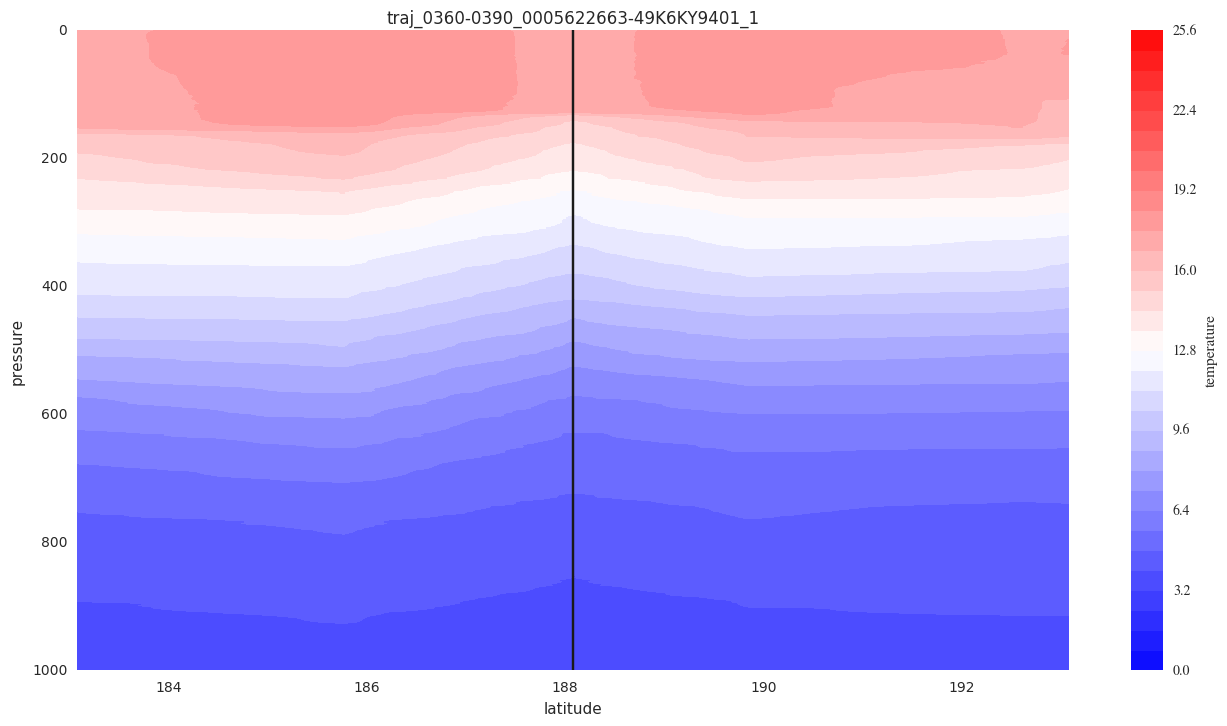

In [155]:
sns.set(color_codes=True)
fig, ax = plt.subplots(figsize=(16, 8))
mpl.rcParams['font.family'] = "STIX"
image = ds_lon.temperature_i.T.plot.contourf(yincrease=False, ax=ax, cmap='bwr',\
                                             vmin=0, vmax=25, levels=40)
image.colorbar.set_label('temperature')
plt.xlim([format(LON)-5, format(LON)+5])
plt.ylim([1000, 0])
plt.axvline(format(LON), color='k')
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('latitude')
plt.ylabel('pressure')
plt.savefig('figures/figure-6/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

In [125]:
a = ds_lon.longitude.values

In [130]:
format_vec = np.vectorize(format)

In [131]:
b = format_vec(a)

In [136]:
a

array([ 133.1142,  133.5767,  134.0545,  134.5912,  135.7322,  136.901 ,
        138.0752,  139.261 ,  140.4253,  141.607 ,  142.7643,  145.0877,
        146.2455,  147.4117,  148.5892,  149.754 ,  150.9183,  152.6878,
        154.2   ,  156.0092,  157.8347,  159.3087,  161.0778,  162.8877,
        162.8737,  164.0753,  165.8807,  167.6723,  168.8285,  170.5885,
        172.3277,  174.0823,  175.8482,  177.5898,  179.3363, -178.9198,
       -177.1605, -174.2327, -171.9193, -170.151 , -167.4085, -164.6603,
       -161.9078, -159.157 , -156.4178, -153.6663, -151.3217, -149.0013,
       -146.6682, -144.5797, -142.7538, -140.6648, -138.9178, -137.1593,
       -135.3237, -133.4903, -131.6663, -129.8327, -127.7452, -125.4175,
       -121.2073])

In [135]:
b

array([ 133.1142,  133.5767,  134.0545,  134.5912,  135.7322,  136.901 ,
        138.0752,  139.261 ,  140.4253,  141.607 ,  142.7643,  145.0877,
        146.2455,  147.4117,  148.5892,  149.754 ,  150.9183,  152.6878,
        154.2   ,  156.0092,  157.8347,  159.3087,  161.0778,  162.8877,
        162.8737,  164.0753,  165.8807,  167.6723,  168.8285,  170.5885,
        172.3277,  174.0823,  175.8482,  177.5898,  179.3363,  181.0802,
        182.8395,  185.7673,  188.0807,  189.849 ,  192.5915,  195.3397,
        198.0922,  200.843 ,  203.5822,  206.3337,  208.6783,  210.9987,
        213.3318,  215.4203,  217.2462,  219.3352,  221.0822,  222.8407,
        224.6763,  226.5097,  228.3337,  230.1673,  232.2548,  234.5825,
        238.7927])

In [133]:
ds_lon.longitude.values = b

In [138]:
ds_lon.longitude.values

array([ 133.1142,  133.5767,  134.0545,  134.5912,  135.7322,  136.901 ,
        138.0752,  139.261 ,  140.4253,  141.607 ,  142.7643,  145.0877,
        146.2455,  147.4117,  148.5892,  149.754 ,  150.9183,  152.6878,
        154.2   ,  156.0092,  157.8347,  159.3087,  161.0778,  162.8877,
        162.8737,  164.0753,  165.8807,  167.6723,  168.8285,  170.5885,
        172.3277,  174.0823,  175.8482,  177.5898,  179.3363,  181.0802,
        182.8395,  185.7673,  188.0807,  189.849 ,  192.5915,  195.3397,
        198.0922,  200.843 ,  203.5822,  206.3337,  208.6783,  210.9987,
        213.3318,  215.4203,  217.2462,  219.3352,  221.0822,  222.8407,
        224.6763,  226.5097,  228.3337,  230.1673,  232.2548,  234.5825,
        238.7927])

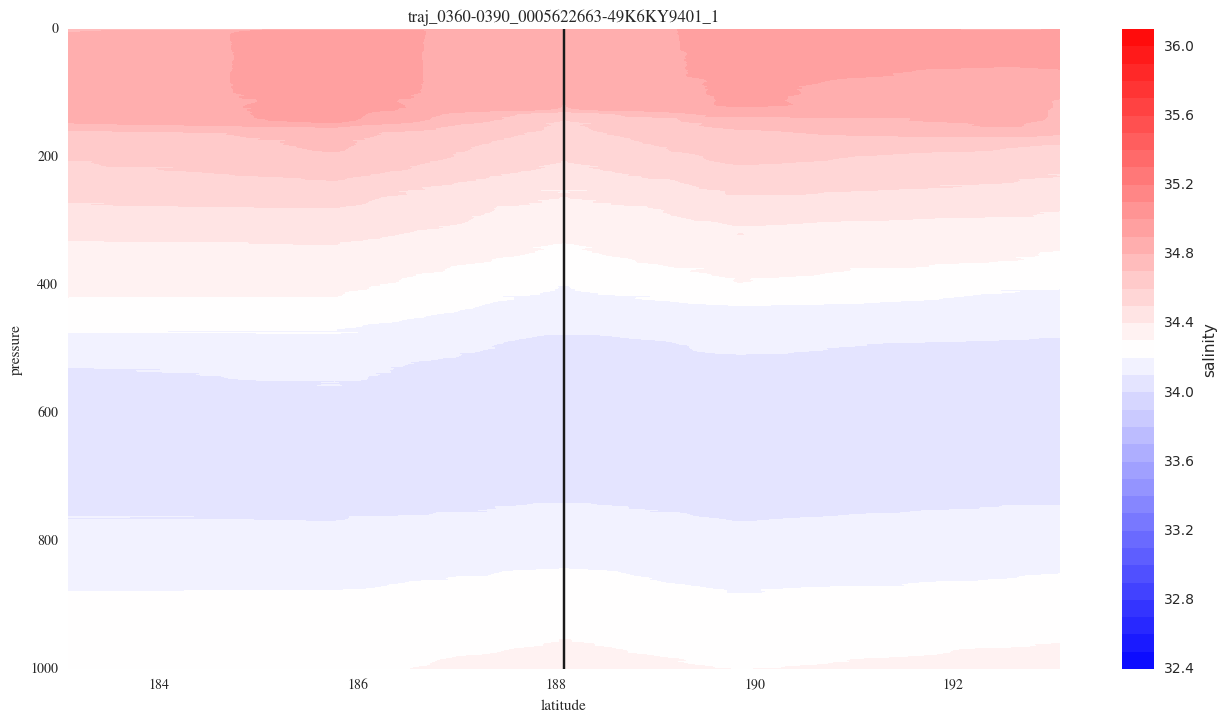

In [162]:
mpl.rcParams['font.family'] = 'STIX'
fig, ax = plt.subplots(figsize=(16, 8))
sns.set(color_codes=True)
image = ds_lon.salinity_i.T.plot.contourf(yincrease=False, ax=ax, cmap='bwr',\
                                          vmin=32.5, vmax=36, levels=40)
image.colorbar.set_label('salinity')
plt.xlim([format(LON)-5, format(LON)+5])
plt.ylim([1000, 0])
plt.axvline(format(LON), color='k')
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('latitude')
plt.ylabel('pressure')
plt.savefig('figures/figure-7/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

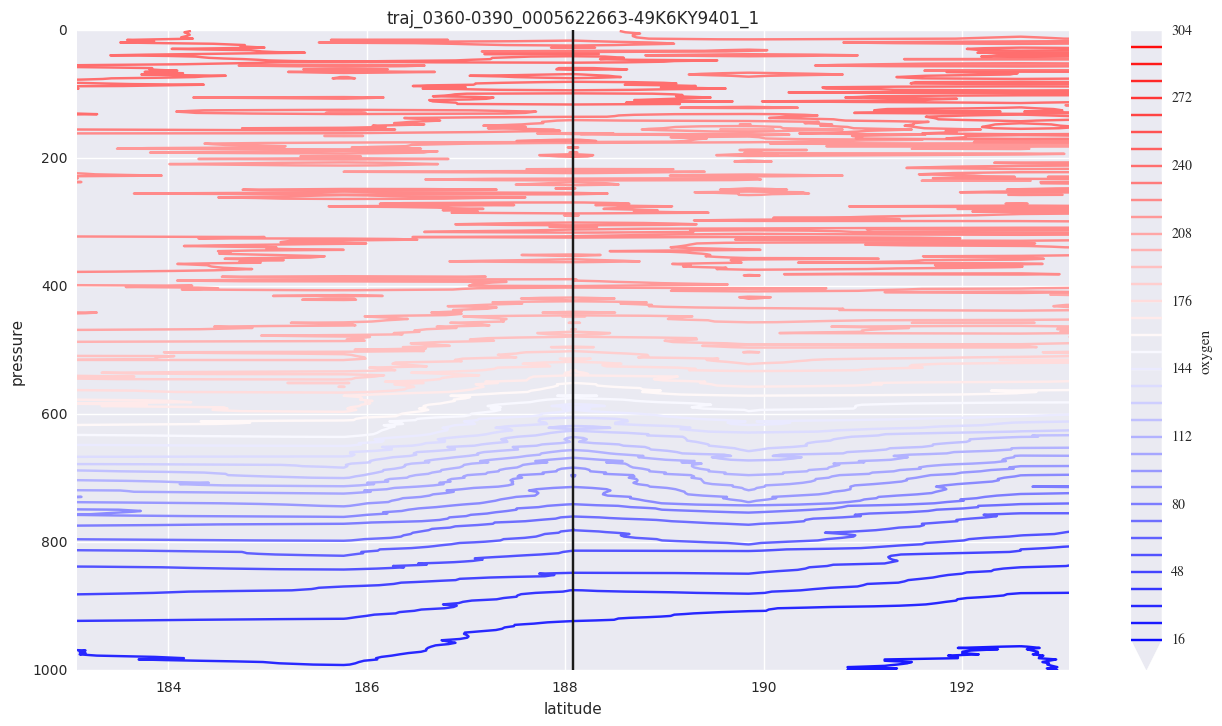

In [165]:
sns.set(color_codes=True)
fig, ax = plt.subplots(figsize=(16, 8))
mpl.rcParams['font.family'] = "STIX"
image = ds_lon.oxygen_i.T.plot.contour(yincrease=False, ax=ax, cmap='bwr',\
                                        vmin=20, vmax=300, levels=40)
image.colorbar.set_label('oxygen')
plt.xlim([format(LON)-5, format(LON)+5])
plt.ylim([1000, 0])
plt.axvline(format(LON), color='k')
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('latitude')
plt.ylabel('pressure')
plt.savefig('figures/figure-8/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()